The first part of the code sets up a list with random targets. We use this list to train our hyper optimization algorithms. In this way we know that they work before testing them on neural networks.

In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

1. **Optimizing with Grid search**

---
1. Write the grid search function that moves through all possible points within a the grid. In our case the grid is 4 dimensional
2. Compare each point visited with the target (our positions list). Use an absolute error.
3. Save the error of each point visited and plot the final result. What trends do you see?
4. What influences the speed of the algorith and how could you speed it up?


In [ ]:
def calculate_error(i,j,k,m):
  return sum(abs(p - t) for p, t in zip([i, j, k, m], positions))

def gridSearch(lowerbounds, upperbounds, positions):
    errors = np.zeros((nbound, lbound, ebound, obound))  # To store the errors
    best_point = None
    min_error = float('inf')

    for i in range(nbound):
        for j in range(lbound):
            for k in range(ebound):
                for m in range(obound):
                    errors[i, j, k, m] = calculate_error(i,j,k,m)

                    if errors[i, j, k, m] < min_error:
                        min_error = errors[i, j, k, m]
                        best_point = [i, j, k, m]
    return errors, best_point, min_error

In [ ]:
nbound = 20
lbound = 15
ebound = 4
obound = 4

upperbounds = [nbound,lbound,ebound,obound]
lowerbounds = [0,0,0,0]

positions = [random.randrange(nbound),random.randrange(lbound),random.randrange(ebound),random.randrange(obound)]
print("Target positions:", positions)

Target positions: [10, 10, 0, 3]


In [ ]:
errors, best_point, min_error = gridSearch(lowerbounds, upperbounds, positions)

Best point found: [10, 10, 0, 3] with an error of 0.0


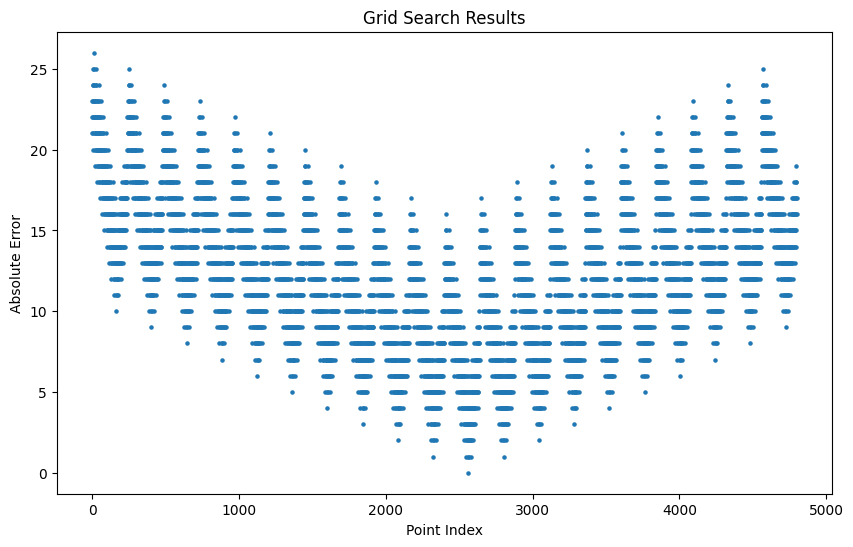

In [ ]:
# Flatten the errors array for plotting
flat_errors = errors.flatten()
print(f"Best point found: {best_point} with an error of {min_error}")
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(flat_errors)), flat_errors, s=5)
plt.xlabel("Point Index")
plt.ylabel("Absolute Error")
plt.title("Grid Search Results")
plt.show()


In [ ]:
errors_3D_zeroes = np.zeros((nbound, lbound, ebound))  # To store the errors
for i in range(nbound):
  for j in range(lbound):
    for k in range(ebound):
      value = errors[i, j, k, best_point[3]] #set the 4th dimension constant as its best value to create a 3D array
      errors_3D_zeroes[i, j, k] = value

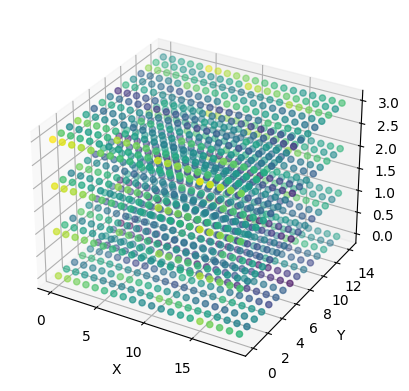

In [ ]:
# Create a meshgrid of coordinates
x = np.arange(nbound)
y = np.arange(lbound)
z = np.arange(ebound)

X, Y, Z = np.meshgrid(x, y, z)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Flatten the error values for plotting
errors = errors_3D_zeroes.flatten()

# Create the 3D scatter plot
ax.scatter(X, Y, Z, c=errors, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

**Optimizing with Simulated annealing **

Write a set of function which perform the simulated annealing cycle
1. Start from a current position.
2. Try to move to a new adjacent position with the parameter *neighbourRange*
3. Make sure the move is not outside the upperbound or lower bounds (Think about what you could do if this turns out to be the case)
4. Check what the error of the new position is, compared to the current position.
5. If the error is lower, move to the new position.
6. If the error is higher, move to the new postion if the acceptance treshold is lower, otherwise stay in the current position.
7. Reduce the temperature by 1
8. Perform this routine until you reach the starting positions or until *routineLimit* has passed.



In [ ]:
lowest_error = 100
temperature = 100
neigbourRange = 1
routineLimit = temperature-1
# Starting position
current_position = (nbound/2,lbound/2,ebound/2,obound/2)


# Define your own function to calculate error
def calculate_error(current_position, known_positions):
    return sum(abs(p - t) for p, t in zip(current_position, known_positions)) # Calculate the difference between the current and new

def move_to_new_position(current_position, neighbor_range, lower_bound, upper_bound, temperature):
    # Create an error factor based on the lowest error, and a coefficient based on pure testing
    error_factor = lowest_error * 0.5
    # For each of the 4 dimensions (p), add a randomrange based on this error factor. This makes sure that, as we get a lower error, we're searching more closely.
    new_position = tuple(p + random.uniform(-neighbor_range*temperature/error_factor, neighbor_range*temperature/error_factor) for p in current_position)
    return new_position

def simulated_annealing(current_position, lowest_error, temperature, neighbor_range, routine_limit, positions):
    # Initialize a few lists and dictionaries
    error_list = []
    search_log = {}

    for n in range(routine_limit):
        # Calculate acceptance threshold
        acceptance_threshold = math.exp(-10/(temperature/(float(n+1))))

        # Randomly move to a new position
        potential_position = move_to_new_position(current_position, neighbor_range, lowerbounds, upperbounds, temperature)

        # Calculate error for the new position
        new_error = calculate_error(potential_position, positions)

        # Determine whether to move to the new position
        if new_error < lowest_error:
            current_position = potential_position
            lowest_error = new_error

        else:
          None

        # Add a check to not reduce temperature, otherwise dividing by 0 (no bueno)
        if temperature > 1:
          temperature -= 1
        else:
          temperature = 1


        # Update error list and search log
        error_list.append(lowest_error)
        search_log[n] = current_position

    return current_position, error_list, search_log

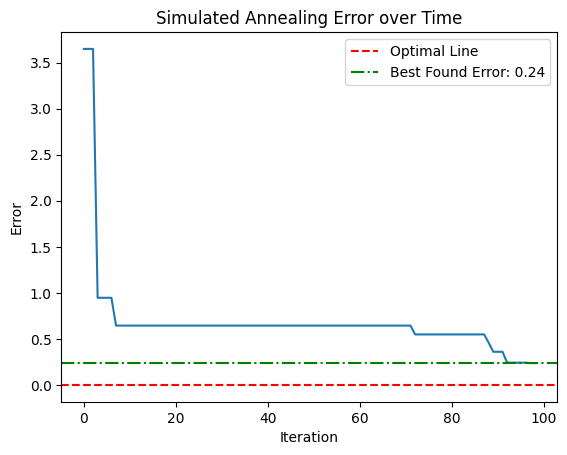

Target positions: [7, 6, 0.5, 0]
Found positions: (6.977681917472004, 6.14024125363459, 0.445107976701934, 0.019725089298038512)
Current chance of improving on any search, (no average taken) 8.080808080808081 %


In [ ]:
final_position, error_list, search_log = simulated_annealing(current_position, lowest_error, temperature, neigbourRange, routineLimit, positions)

# Check improvement chance, start at 1 to not take the -1th of a list of tuples, since the first is always new:
times_checked = 1
for i in range(len(search_log)-1):
  if search_log[i+1] != search_log[i]:
    times_checked += 1
  else:
    None

# Plot the errors over time
plt.plot(range(len(error_list)), error_list)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Simulated Annealing Error over Time")

# Add the optimal line at 0.00
plt.axhline(0.00, color='red', linestyle='--', label='Optimal Line')

# Add the best found error line
best_error = min(error_list)
plt.axhline(best_error, color='green', linestyle='-.', label=f'Best Found Error: {best_error:.2f}')

plt.legend()
plt.show()
print("Target positions:", positions)
print("Found positions:", search_log[list(search_log)[-1]])

print("Current chance of improving on any search, (no average taken)", 100*times_checked/len(search_log),"%")

1 Plot the errors over time, can you see a difference with gridsearch?
2. How could we speed up this algorithm?
3. What are potential drawbacks you can see comparing this method to gridsearch?

1. The errors aren't uniform. They are very random by nature. When looking at the errors, there's a great possibility that they do not improve over time by randomness. The chance to improve on the previous search is left to choice and is less than 50%.

2. A speedup can be achieved by checking if it the new error is going in the right directions (gradient). I have implemented this crudely in the form of a error_factor adjustment. A better gradient could guide the annealing greatly, increasing the improvement chance to 50% instead of the current ~25%. Additional speedups could be gotten by reducing the routinelimit and improving the initial guess.

3. A drawback is its great randomness, and not finding a better optimum given a large amount of time. But, it could be good for searching a wide parameter range all at once.

Additionally, I used a decreasing neighbourhood to narrow down later on. This has also been proposed and is currently used with simulated annealing: https://www.sciencedirect.com/science/article/abs/pii/S1568494610001304

I am editing all parameters at the same time, for a wide variety of parameters, this might be too slow. However, this does take into account the combination of factors in parameters. Editing a single parameter could overshadow the relationship between the different parameters, since the final result depends on the combination of parameters, not just their individual contributions.

***Predicting H2***

This part of the code creates an flexible neural network in PyTorch. It is not required to understand it, but feel free to look through it. As you can see the __init__ of the neuralnetwork class takes the four flexible parameters as arguments., along with input and output data

In [ ]:
import torch
import math
import pickle
from torch.utils.data import Subset
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
import shutil
import tables as tb

class NeuralNetwork():
    def __init__(self, input, output,
                 hiddenlayer_size,hiddenlayer_number, learning_rate, activation, plotting = False):

        self.dataset = NNDataset(input,output)
        self.dataloader = DataLoader(self.dataset, batch_size=1,shuffle= 'True')
        self.testDataloader = DataLoader(self.dataset,batch_size=None,shuffle= 'False')
        self.hiddenlayer_size = hiddenlayer_size
        if activation == 1:
          self.activation = "tanh"
        elif activation == 2:
          self.activation = "sigmoid"
        elif activation == 3:
          self.activation = "relu"
        self.hiddenlayer_number = hiddenlayer_number
        self.learning_rate = learning_rate

        network = NeuralNet( 1, hiddenlayer_size, hiddenlayer_number, len(output[0]),
                              self.activation)
        self.model = network.model
        self.loss_fn = self.get_loss_function("MSE")
        self.model.double()
        self.epochs = 200
        self.predictions= []
        self.epoch_step = 100
        self.plotting = plotting
    # Use the optim package to define an Optimizer that will update the weights of
    # the model for us. Here we will use Adam; the optim package contains many other
    # optimization algoriths. The first argument to the Adam constructor tells the
    # optimizer which Tensors it should update.
        self.learning_rate = learning_rate
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # N is batch size; D_in is input dimension;
        # H is hidden dimension; D_out is output dimension.
        # create your dataset
        # create your dataloader






    def get_interpolators(self, db, properties):
        print("test")

    def save(self, filename):
        torch.save(self.model, filename)

    def _save(self):
        torch.save(self.model, self.weights_file)

    def loadweights(self, filename):
        self.model = torch.load(filename)
        self.model.eval()

    def get_interpolators_from_file(self, filename, properties):
        """Properties contains a tuple of [energy,gradient] """
        return {prop_name: self.db[prop_name].shape[1:] for prop_name in properties}


    def get(self, request):
        """Gives object with coordinates and desired properties"""
        pass
    def export(self):
        shutil.copy(self.weights_file, self.model_filename)
    def train(self):
        minimum_loss = math.inf
        printinglog = []
        for t in range(self.epochs):

            for index, data in enumerate(self.dataloader,0):
                local_batch, local_labels = data
                y_pred = self.model(local_batch)
                loss = self.loss_fn(y_pred, local_labels)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()


            if t % self.epoch_step == 0:
                self.predictions.append(y_pred)
                lossprint = loss
                if lossprint < minimum_loss:
                    minimum_loss = lossprint
                print(f"{lossprint} {t} {self.hiddenlayer_size} {self.hiddenlayer_number} {self.learning_rate} {self.activation}")
                printinglog.append(lossprint)

        print("Done Training")
        model_predictions = []
        testpoint_positions = []
        losssquared = 0
        xAxis = np.arange(0.25,5.05,0.05)
        xAxis = xAxis.astype(np.double)
        xAxis = torch.from_numpy(xAxis)

        for index, data in enumerate(xAxis,0):
                local_batch = data
                y_pred = self.model(torch.flatten(local_batch))
                #print(y_pred)
                #print(torch.flatten(local_batch))
                model_predictions.append(y_pred.tolist())
                # Compute and print loss
                testpoint_positions.append(local_batch.tolist())
                loss = self.loss_fn(y_pred, local_labels)
                losssquared += loss.item()
        print(model_predictions)
        if self.plotting == True:
          xAxis = np.arange(0.25,5.05,0.05)
          plt.ylabel("Ev")
          plt.xlabel("Bond Distance")
          plt.plot(xAxis,model_predictions)
          plt.show()



        return minimum_loss

    def get_loss_function(self,loss):
        if loss == 'MSE':
            return torch.nn.MSELoss()
class NNDataset(torch.utils.data.Dataset):
    """Molecule Data set"""

    def __init__(self, coordinates, energyCurves):
        self.coordinates =torch.tensor(coordinates)
        self.energyCurves = torch.tensor(energyCurves)

    def __getitem__(self,index):
        coordinate = self.coordinates[index]
        curve = self.energyCurves[index]

        return coordinate, curve

    def __len__(self):
        return len(self.coordinates)

    def input_shape(self):
        return list(self.coordinates[0].size())[0] *3
    def output_shape(self):
        return list(self.energyCurves[0].size())[0]

class NeuralNet(torch.nn.Module):
    def __init__(self, inputsize,   hiddensize, hiddennumber, outputsize, normalizer="tanh"):
        super(NeuralNet, self).__init__()
        self.hidden = torch.nn.ModuleList()
        if normalizer == "tanh":
            self.hidden.append(torch.nn.Linear(inputsize, hiddensize))
            self.hidden.append(torch.nn.Tanh())
            for k in range(hiddennumber):
                self.hidden.append(torch.nn.Linear(hiddensize, hiddensize))
                self.hidden.append(torch.nn.Tanh())
            self.hidden.append(torch.nn.Linear(hiddensize,outputsize))
        if normalizer == "sigmoid":
            self.hidden.append(torch.nn.Linear(inputsize, hiddensize))
            self.hidden.append(torch.nn.Sigmoid())
            for k in range(hiddennumber):
                self.hidden.append(torch.nn.Linear(hiddensize, hiddensize))
                self.hidden.append(torch.nn.Sigmoid())
            self.hidden.append(torch.nn.Linear(hiddensize, outputsize))
        if normalizer == "relu":
            self.hidden.append(torch.nn.Linear(inputsize, hiddensize))
            self.hidden.append(torch.nn.ReLU())
            for k in range(hiddennumber):
                self.hidden.append(torch.nn.Linear(hiddensize, hiddensize))
                self.hidden.append(torch.nn.ReLU())
            self.hidden.append(torch.nn.Linear(hiddensize,outputsize))
        self.model = torch.nn.Sequential(*self.hidden)



This part downloads the training data using google drive permissions. You can use your university google account for this.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
<class 'netCDF4._netCDF4.Variable'>
float64 crd(frame, natoms, three)
unlimited dimensions: frame
current shape = (96, 2, 3)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 energy(frame, nstates)
unlimited dimensions: frame
current shape = (96, 3)
filling on, default _FillValue of 9.969209968386869e+36 used


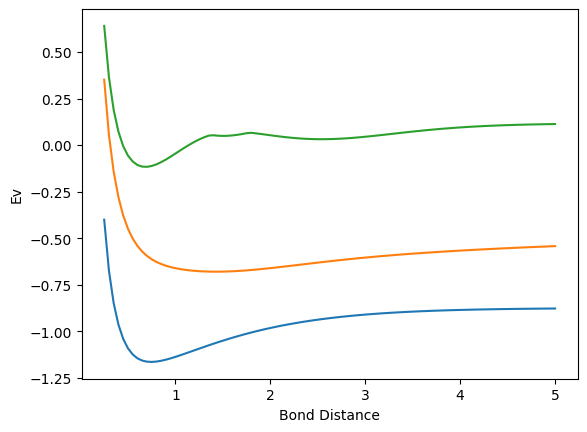

In [ ]:
%pip install netCDF4
import netCDF4 as nc

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF/view?usp=sharing'
id ='1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('testdata.nc')
testdata = 'testdata.nc'
ds = nc.Dataset(testdata)

for var in ds.variables.values():
    print(var)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])

plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
plt.show()

Here we set up the data again without redownloading it for your convience.

<class 'netCDF4._netCDF4.Variable'>
float64 crd(frame, natoms, three)
unlimited dimensions: frame
current shape = (96, 2, 3)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 energy(frame, nstates)
unlimited dimensions: frame
current shape = (96, 3)
filling on, default _FillValue of 9.969209968386869e+36 used


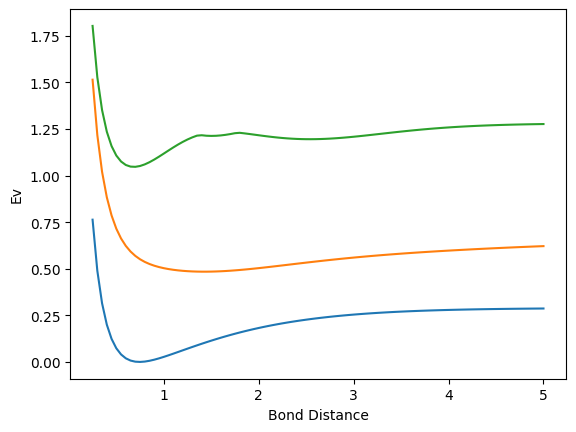

In [ ]:
fn = '/content/testdata.nc'
ds = nc.Dataset(fn)

for var in ds.variables.values():
    print(var)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])

yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
plt.show()


input_array = np.reshape(xAxis, (-1, 1))
output_array = yAxis

"""""

Here we can use the simulated annealing to test multiple neural networks. We are going to vary the parameters:

g for number of nodes = 10 - 100

i for hidden layers (1-6)

h for learning rate [1,0.1,0.001,0.0001]

j for activation (1-3)

"""""

First we'll need to recast the values of some these to single spaced intergers for our simulated annealing. Write a function(s) that translate these ranges to be used with simulated annealing, but is also able to translate them back (Think about why you need to be able to translate them back as well).

Next use simulated annealing to find a well performing neural network. You can use the code snippet below to create a neural network and compare the error. Once you found hyperparameters you are happy with, you can run the neural network again with plotting=true to plot the predictions.


1. Compare the prediction on the training set with the original data. Where do good fits still struggle?

  **My good fit still struggles on the dip in bond distance in the green line, because it seems like data from an outliar, which the model isn't good at, especially tanh.**

2. How many runs does your simulated annealing need on average, and how could you improve this?
  
  **My simulated annealing needs on average 10 runs, but that's because the starting values quickly find the optimal, since it is closer. However, the loss function inplemented doesn't take the full data correctly into account, resulting in poor performance. This could be improved upon, additionally adding an agent which adds the negatives of a previous search when not finding optimal values (trying to take the negative of the initial randomization when not finding better values)**

3. (Bonus) The current data set only has training data, would splitting the data into training, validation and test help? In which part of the code would you use the training, validation and test parts of the data set.
  
  **It could, but to be honest this project's code does not seem to work optimally as intended, so I'll leave this as an exercise for the viewer.**


In [ ]:
def map_to_hyperparameters(g, i, h, j):
    # Mapping function to convert integers to hyperparameters
    hiddenlayer_size = g # maps 10-100 nodes
    hiddenlayer_number= i # maps 1-6 layers
    learning_rate = h # 1-0.1-0.001-0.0001 learning rate
    activation_functions = ["tanh", "sigmoid", "relu"]
    activation = activation_functions[j-1] # type of function, accounted for index (starting at 0)

    return hiddenlayer_size, hiddenlayer_number, learning_rate, activation

def map_to_integers(hiddenlayer_size, hiddenlayer_number, learning_rate, activation):
    g = hiddenlayer_size  # maps 10-100 nodes
    i = hiddenlayer_number # maps 1-6 layers
    h = learning_rate # 1-0.1-0.001-0.0001 learning rate
    j = activation # type of function

    return g, i, h, j

# Define the objective function to minimize (e.g., mean squared error)
def objective_function(hiddenlayer_size, hiddenlayer_number, learning_rate, activation):
    g, i, h, j = map_to_integers(hiddenlayer_size, hiddenlayer_number,learning_rate, activation)

    network = NeuralNetwork(xAxis, yAxis, hiddenlayer_size=g, hiddenlayer_number=i, learning_rate=h, activation=j, plotting=False)
    error = network.train()

    return error

def get_neighbor(current_solution):
    neighbor = list(current_solution)
    neighbor[0] = min(100, max(10, neighbor[0] + random.choice([-10, 0, 10])))      # Nodes
    neighbor[1] = min(6, max(1, neighbor[1] + random.choice([-1, 0, 1])))           # Hidden layers
    neighbor[2] = random.choice(learning_rate_list)                                 # Learning rate, neighbours exist but it's shit with indices and it's only 4 anyway
    neighbor[3] = min(3, max(1, neighbor[3] + random.choice([-1, 0, 1])))           # Activation, no neighbour is here so we randomize

    return tuple(neighbor)

In [ ]:
#   THIS TAKES 10 MINUTES DECREASE iterations = 20 to 5 to speed it up!

# Define lists for hyperparameters
hidden_layers_list = list(range(10, 101, 10))
nodes_list = list(range(1, 7))
learning_rate_list = [1.0, 0.1, 0.001, 0.0001]
activation_list = list(range(1, 4))

# Simulated Annealing parameters
initial_solution = (50, 4, 0.001, 1)  # Initial hyperparameters
initial_temperature = 1.0
cooling_rate = 0.95
iterations = 20 # Decreased from 20 to find optimal, it took 1.5 hours...

current_solution = initial_solution
current_error = objective_function(*current_solution)
best_solution = current_solution
best_error = current_error

for iteration in range(iterations):
    neighbor = get_neighbor(current_solution)
    neighbor_error = objective_function(*neighbor)

    acceptance_probability = min(1, math.exp((current_error - neighbor_error) / initial_temperature))

    if random.random() < acceptance_probability:
        current_solution = neighbor
        current_error = neighbor_error

    if current_error < best_error:
        best_solution = current_solution
        best_error = current_error

    initial_temperature *= cooling_rate

# Convert the best solution back to hyperparameters
best_hyperparameters = map_to_hyperparameters(*best_solution)

# Print the best hyperparameters and corresponding error
print("Best Hyperparameters:", best_hyperparameters)
print("Best Error:", best_error)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 3])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.000519219739014664 0 50 4 0.001 tanh
5.339401945995698e-05 100 50 4 0.001 tanh
Done Training
[[0.7451681223636066, 1.4899569622384055, 1.7684544747163324], [0.4770513981785178, 1.1998646974854044, 1.498671478035231], [0.3026415709875123, 1.0039839879651922, 1.3335118037589668], [0.1988121514757552, 0.8704298818770332, 1.233248698914944], [0.12282964853641185, 0.7623624207076459, 1.1568551703021646], [0.06939507011400385, 0.6839345413174586, 1.1034207926564565], [0.03462961062895961, 0.632082578610299, 1.0707423756063383], [0.013346855458054502, 0.5984088510102911, 1.0533422343171326], [0.0012800292968328103, 0.5757739184904074, 1.0464592445781984], [-0.004413508761551568, 0.5595646839842763, 1.046978194601329], [-0.005504741333585861, 0.54702062461393, 1.0529657980004574], [-0.003117897986144702, 0.5365359310645811, 1.0631248441289685], [0.0019581852201228656, 0.5272245590982622, 1.076426778944296], [0.009076769243370045, 0.5186654220550416, 1.0919139802709026], [0.017637486249393958

In [ ]:
print(best_solution)

(60, 4, 0.0001, 1)


0.00456797881962763 0 50 4 0.001 tanh
0.00029317988205980857 100 50 4 0.001 tanh
Done Training
[[0.7613381153639388, 1.5084512294249324, 1.8004439618160613], [0.48437952962884967, 1.2127883835285984, 1.5164266496349978], [0.3215989685163444, 1.0218665503129627, 1.357491906119488], [0.20932329971077313, 0.8913918301070068, 1.2458624300326897], [0.12930295254210572, 0.7906342560779318, 1.1649598069988933], [0.07583812733699132, 0.7155596090460805, 1.1120392903390839], [0.0418968637549738, 0.6614451609010007, 1.0803713631707739], [0.021163701429817494, 0.6223327788252924, 1.0635426383636297], [0.009172349732014529, 0.5932743190052673, 1.056942327463625], [0.003098195353819555, 0.5708900334353014, 1.0575157758799503], [0.001209318756521388, 0.5530554467046018, 1.0632254695066228], [0.0024191904176880386, 0.538474119770336, 1.0726322960401342], [0.006001228895607336, 0.526355921308047, 1.0846347588020522], [0.01142327267225099, 0.5162091541023475, 1.0983256669278687], [0.018257909997509786,

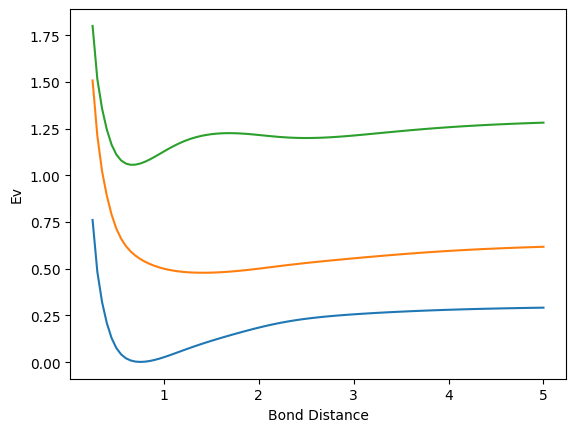

tensor(0.0003, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [ ]:
best_solution = (50, 4, 0.001, 1) # This is my best solution after 2 hours of searching, 40 iterations. 50 Nodes, 4 hidden layers,a Learning rate of 0.001, and tanh worked best, but relu is 50% faster
g, i, h, j = best_solution
# Create the neural network with best hyperparameters and enable plotting
network = NeuralNetwork(xAxis, yAxis, hiddenlayer_size=g, hiddenlayer_number=i, learning_rate=h, activation=j, plotting=True)
# Train the neural network and plot the predictions
network.train()

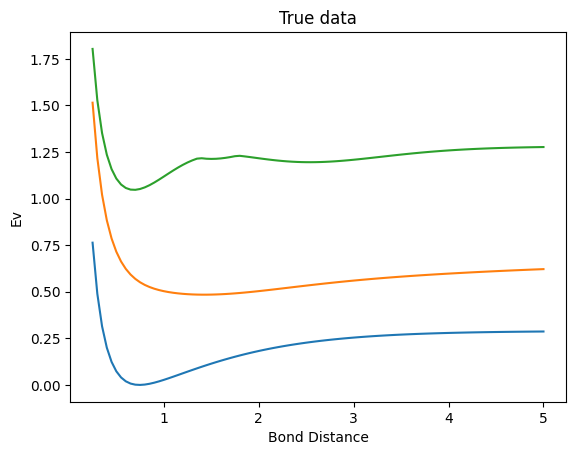

In [ ]:
# Comparing to the original data

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])

yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.title("True data")
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
plt.show()